# Iris dataset

# importing necessary libraries

In [1]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [2]:
ir=pd.read_csv("Iris.csv")
ir

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


# basic understanding

In [3]:
ir.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
ir.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [5]:
d1=ir.copy(deep=True)

In [6]:
d1.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [7]:
d1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [8]:
d1.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [9]:
d1.count()

Id               150
SepalLengthCm    150
SepalWidthCm     150
PetalLengthCm    150
PetalWidthCm     150
Species          150
dtype: int64

In [10]:
d1.shape

(150, 6)

In [11]:
d1.dtypes

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

We got the basic understanding of the dataset now. It is the dataset of 150 rows and 6 columns of three species of Iris flowers.

# null or missing data handling

In [12]:
d1.nunique()

Id               150
SepalLengthCm     35
SepalWidthCm      23
PetalLengthCm     43
PetalWidthCm      22
Species            3
dtype: int64

In [13]:
d1.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [14]:
d1.duplicated().sum()

0

There are no special unique characters, missing values or duplicates in the data.

In [15]:
d1.skew()

Id               0.000000
SepalLengthCm    0.314911
SepalWidthCm     0.334053
PetalLengthCm   -0.274464
PetalWidthCm    -0.104997
dtype: float64

In [16]:
d1.median()

Id               75.50
SepalLengthCm     5.80
SepalWidthCm      3.00
PetalLengthCm     4.35
PetalWidthCm      1.30
dtype: float64

There is an unwanted column in the given dataset. Now we remove it and seperate numerical and categorical variable columns.

In [17]:
d1=d1.drop(["Id"],axis=1)

In [18]:
d1

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [19]:
numerical=["SepalLengthCm","SepalWidthCm","PetalLengthCm","PetalWidthCm"]
categorical=["Species"]

# outlier detection and removal

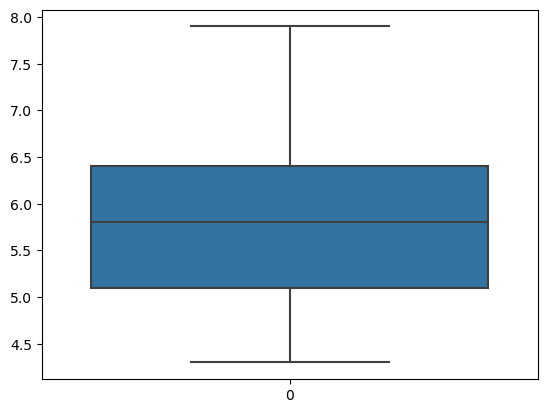

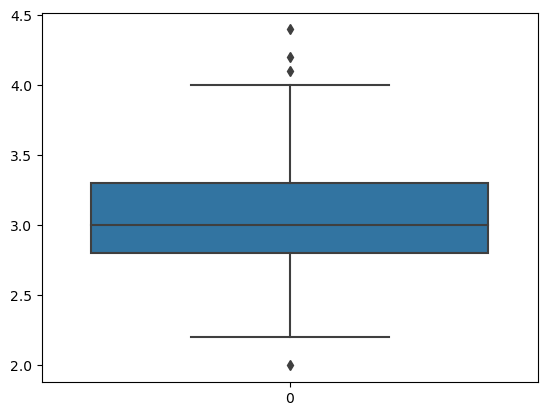

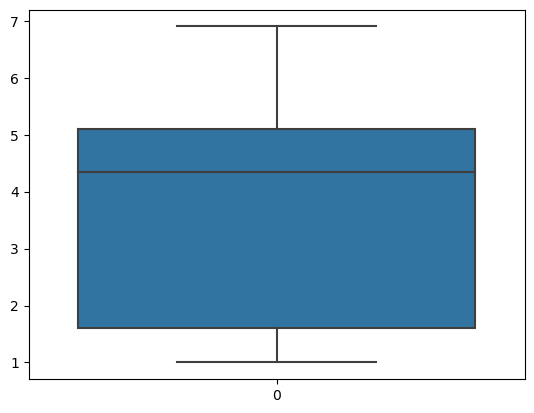

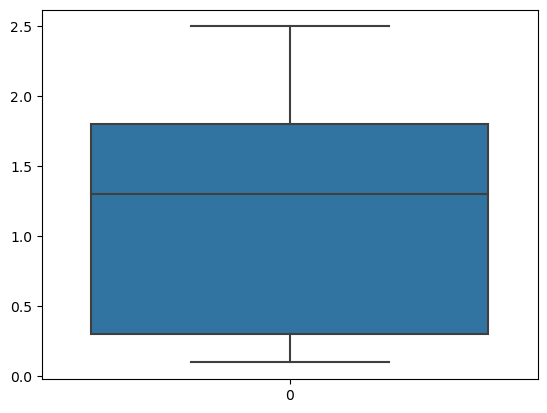

In [20]:
for i in numerical:
    sns.boxplot(data=d1[i])
    plt.show()

In [21]:
def out(x,data):
    q1=data[x].quantile(0.25)
    q3=data[x].quantile(0.75)
    iqr=q3-q1
    upper= q3+(iqr*1.5)
    lower= q1-(iqr*1.5)
        
    for i in data[x]:
        if i<lower or i>upper:
            data[x].replace(i,np.nan,inplace=True)
    data[x].fillna(data[x].median(),inplace=True)

In [22]:
for i in numerical:
    out(i,d1)

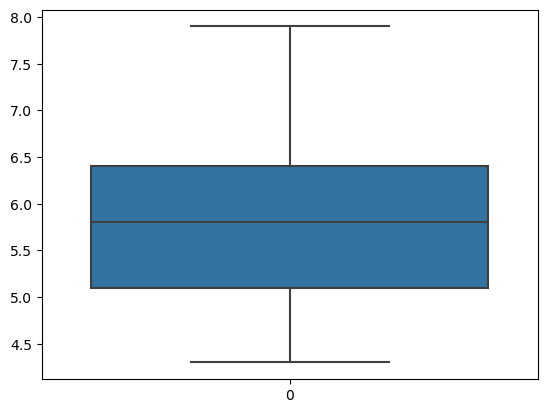

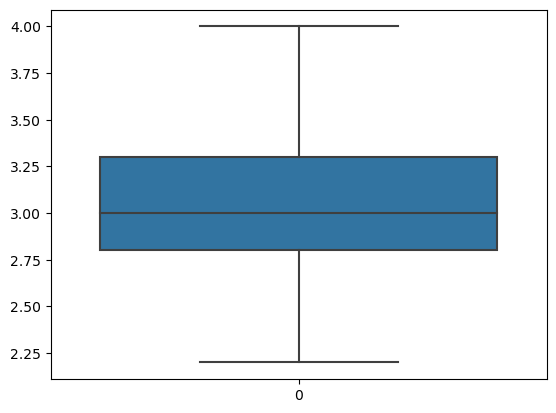

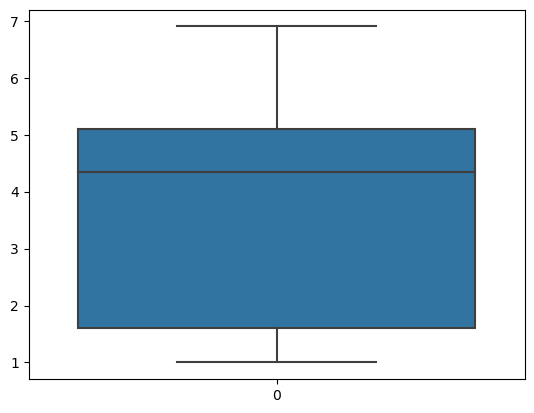

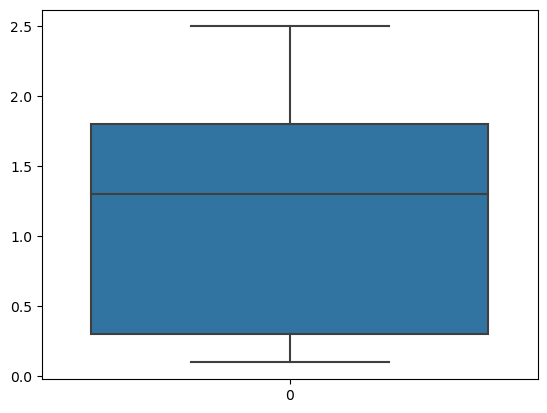

In [23]:
for i in numerical:
    sns.boxplot(data=d1[i])
    plt.show()

In [24]:
d1.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

We have removed the outliers by replacing them with median value of the particular column.

# Visualisation

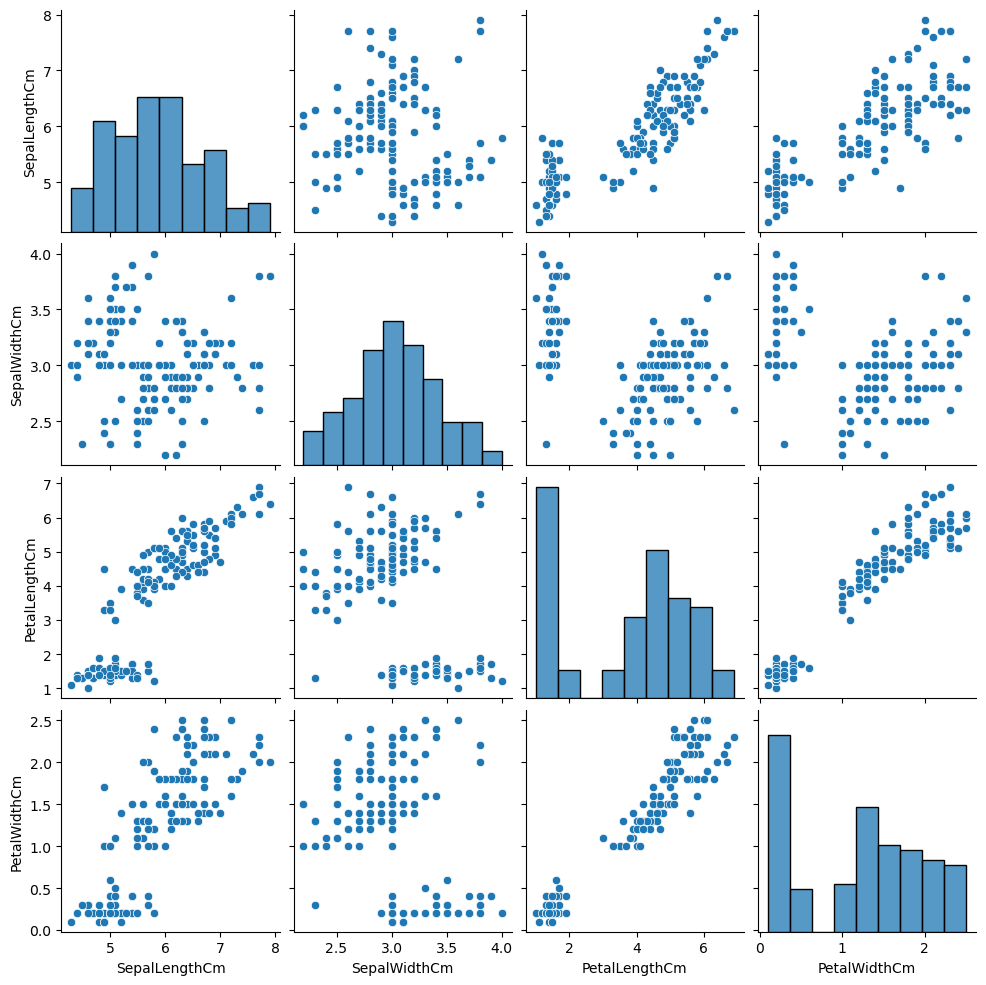

In [25]:
 sns.pairplot(data=d1)

Here, from pairplot we'll get an idea of how each columns are related to one another.

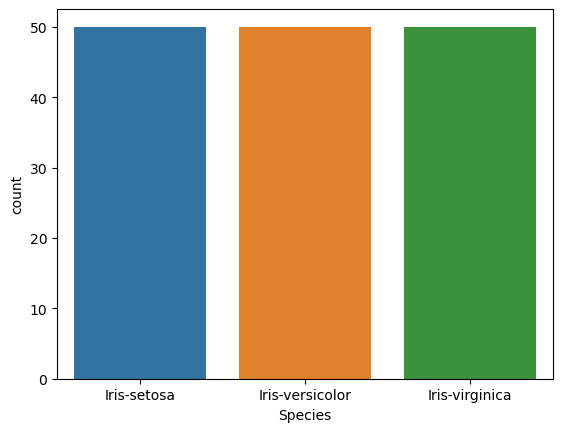

In [26]:
sns.countplot(data=d1,x="Species")
plt.show()

From countplot of the categorical variable, that is, the three species of the iris flower, we could say that they are equal in number in the given dataset. To understand the correlation between the attributes, a heatmap can be drawn.

<AxesSubplot:>

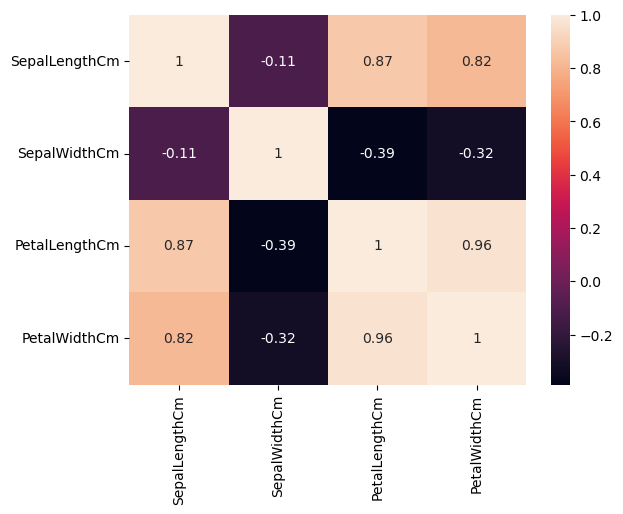

In [27]:
sns.heatmap(data=d1.corr(),annot=True)

# encoding and model building

In [28]:
encode=LabelEncoder()

In [29]:
d1["Species"]=encode.fit_transform(d1["Species"])
d1

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [30]:
X=d1[["SepalLengthCm","SepalWidthCm","PetalLengthCm","PetalWidthCm"]].values

In [31]:
Y=d1["Species"].values

In [32]:
X_train,X_test,y_train,y_test =train_test_split(X,Y,test_size=0.3,random_state=0)

In [33]:
model=LogisticRegression(solver='liblinear')

In [34]:
model.fit(X_train,y_train)

LogisticRegression(solver='liblinear')

In [35]:
y_pred=model.predict(X_test)

In [36]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [37]:
accuracy_score(y_test,y_pred)

0.8888888888888888

In [38]:
confusion_matrix(y_test,y_pred)

array([[16,  0,  0],
       [ 0, 13,  5],
       [ 0,  0, 11]], dtype=int64)

In [39]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      0.72      0.84        18
           2       0.69      1.00      0.81        11

    accuracy                           0.89        45
   macro avg       0.90      0.91      0.88        45
weighted avg       0.92      0.89      0.89        45



# prediction

In [41]:
model.predict([[3.7,1.6,2.5,0.6]])

array([1])